In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
el_system = pd.read_csv("ratings_Electronics.csv",
                      names=['userid', 'productid','rating','timestamp'])
el_system.head()


,userid,productid,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1.365811e+09
1,A2CX7LUOHB2NDG,0321732944,5.0,1.341101e+09
2,A2NWSAGRHCP8N5,0439886341,1.0,1.367194e+09
3,A2WNBOD3WNDNKT,0439886341,3.0,1.374451e+09
4,A1GI0U4ZRJA8WN,0439886341,1.0,1.334707e+09


In [5]:
el_system.shape

(952849, 4)

In [7]:
el_system.drop(columns = ['timestamp'], inplace = True)

In [8]:
# check the unique number of users and products
#The unique users is about 1.2M and unique products is about 100k, so item-based is the best model for this
print("Number of unique users:", el_system['userid'].nunique())
print("Number of unique products:", el_system['productid'].nunique())

Number of unique users: 723336
Number of unique products: 56240


In [9]:
el_system.isna().sum()

,0
userid,0
productid,0
rating,1


In [10]:
# Drop Na
el_system.dropna(inplace=True)

In [11]:
# Check for the max and min rating
print("Manimum rating is:", el_system['rating'].min())
print("Maximum rating is:", el_system['rating'].max())

Manimum rating is: 1.0
Maximum rating is: 5.0


In [12]:
# Average rating per user
user_rating = el_system.groupby('userid')['rating'].mean()
user_rating = user_rating.round(2)
user_rating.head()

,rating
userid,
A00038802J7X43YTW44TD,3.0
A000428226SAAAIBK8I36,5.0
A0004478EF5NFPHLGCWG,4.0
A000681618A3WRMCK53V,2.0
A00101847G3FJTWYGNQA,5.0


In [13]:
# # Average rating per product
product_rating = el_system.groupby('productid')['rating'].mean()
product_rating = product_rating.round(2)

In [14]:
user_rating = user_rating.to_dict()
product_rating = product_rating.to_dict()

In [15]:
def user_avg_rating(user_id):
  return user_rating[user_id]
def product_avg_rating(product_id):
  return product_rating[product_id]

In [16]:
for i,j in product_rating.items():
  if i == '0132793040':
    print(j)

5.0


In [17]:
#let's map these into our data frame
el_system['user_avg_rating'] = el_system['userid'].map(user_avg_rating)
el_system['product_avg_rating'] = el_system['productid'].map(product_avg_rating)

In [ ]:
el_system.info()

In [ ]:
el_system.describe()

In [18]:
# Count per rating
el_system['rating'].value_counts()

,count
rating,
5.0,514115
4.0,189539
1.0,116916
3.0,75629
2.0,56649


In [19]:
# Item with the highest rating
el_system.groupby('productid')['rating'].mean().sort_values(ascending=False).head()

,rating
productid,
0132793040,5.0
B000BB69AS,5.0
B0000665VE,5.0
B0000665VH,5.0
B0000665VM,5.0


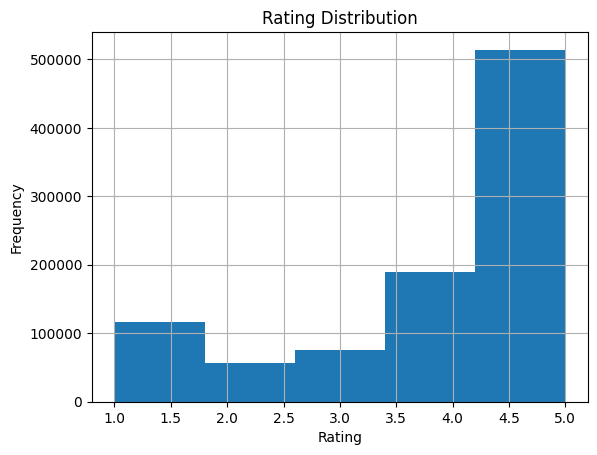

In [20]:
# Distribution of ratings
el_system['rating'].hist(bins=5)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.savefig('distribution_of_ratings.png')
plt.show()

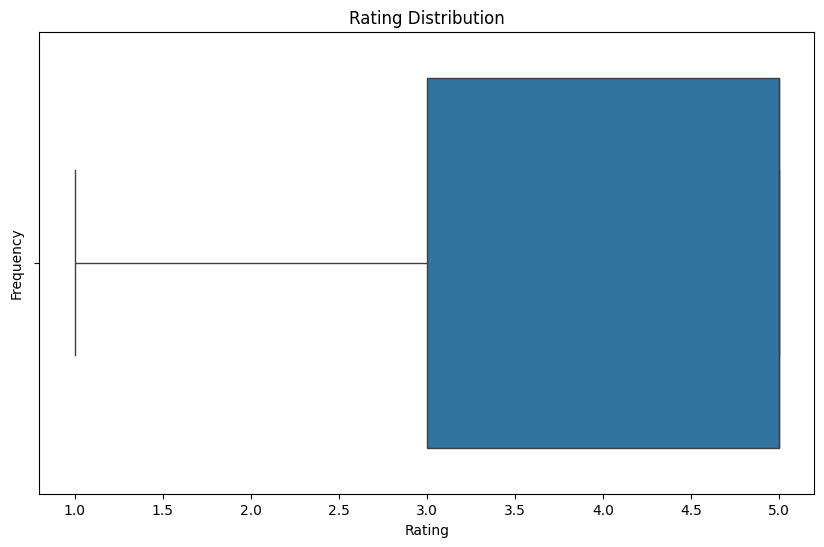

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', data=el_system)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.savefig('Box Plot Rating Distribution.png')
plt.show()

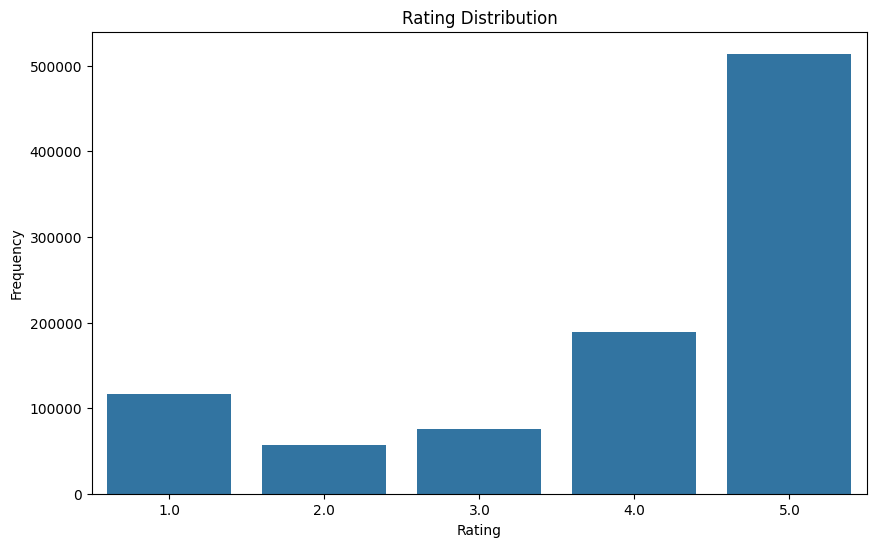

In [22]:
#let's check the rating distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=el_system)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.savefig('Rating Distribution.png')
plt.show()

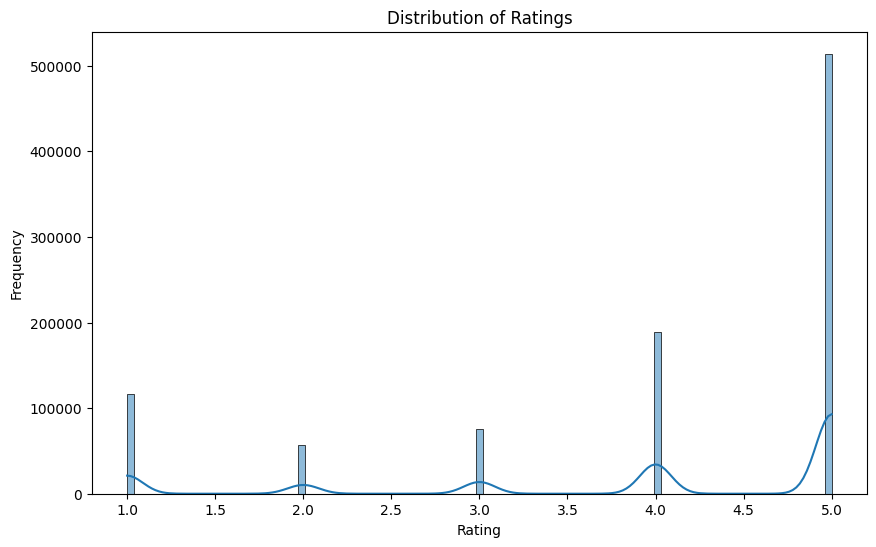

In [23]:
#To create a histogram or density plot to visualize the distribution of ratings across all users and items.
plt.figure(figsize=(10, 6))
sns.histplot(el_system['rating'], kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.savefig('histogram to visualize the distribution of ratings.png')
plt.show()


In [24]:
#Determine whether the ratings are skewed
skewness = el_system['rating'].skew()
print("Skewness:", skewness)

Skewness: -1.155175402233696


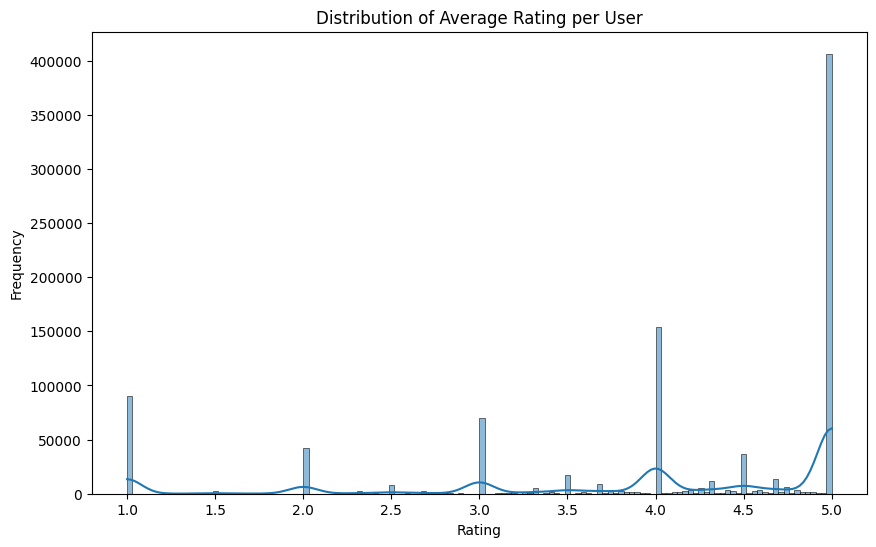

In [25]:

#To create a histogram or density plot to visualize the distribution of ratings across all users and items.
plt.figure(figsize=(10, 6))
sns.histplot(el_system['user_avg_rating'], kde=True)
plt.title('Distribution of Average Rating per User')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.savefig('histogram to visualize the distribution of Average Rating per User')
plt.show()


In [26]:
#Determine whether the ratings are skewed
skewness = el_system['user_avg_rating'].skew()
print("Skewness:", skewness)

Skewness: -1.2079373031414296


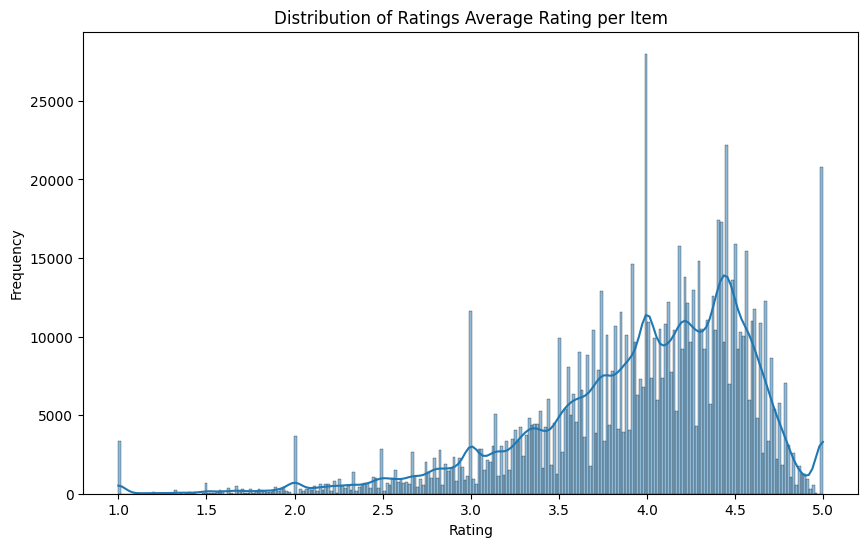

In [27]:

#To create a histogram or density plot to visualize the distribution of ratings across all users and items.
plt.figure(figsize=(10, 6))
sns.histplot(el_system['product_avg_rating'], kde=True)
plt.title('Distribution of Ratings Average Rating per Item')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.savefig('histogram to visualize the distribution of Average Rating per Item.png')
plt.show()

In [28]:
#Determine whether the ratings are skewed
skewness = el_system['product_avg_rating'].skew()
print("Skewness:", skewness)

Skewness: -1.2499990121865077


<ipython-input-29-78e1ba2721cb>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(el_system['rating'], shade=True)


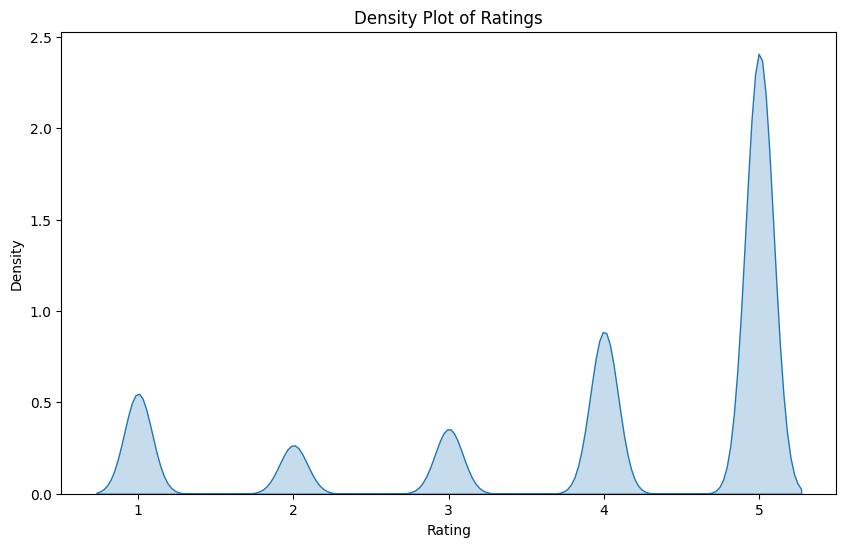

In [29]:
#create a density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(el_system['rating'], shade=True)
plt.title('Density Plot of Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.savefig('Density Plot of Ratings.png')
plt.show()

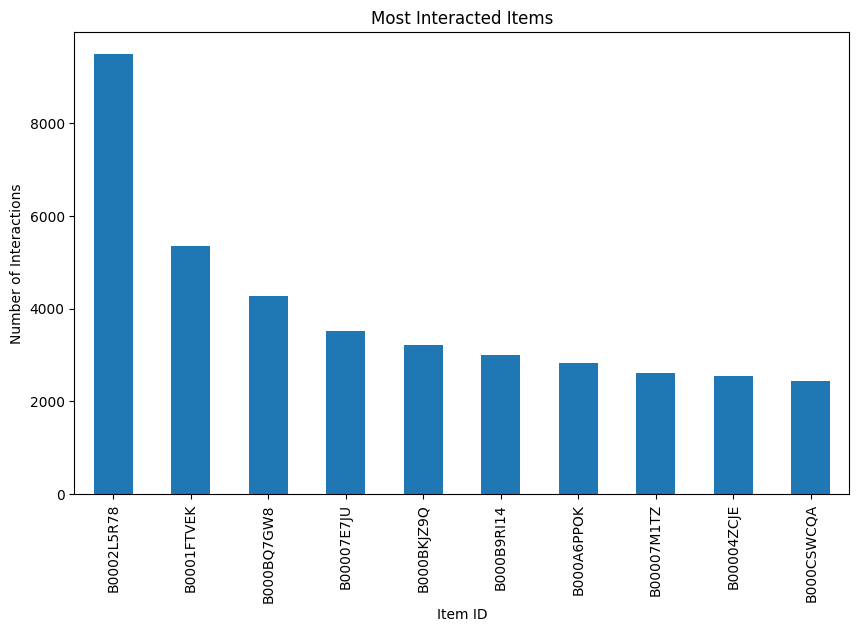

In [30]:
#Identify items that receive the most interactions
most_interacted_items = el_system['productid'].value_counts().head(10)
most_interacted_items

#plot these as a bar chart.
plt.figure(figsize=(10, 6))
most_interacted_items.plot(kind='bar')
plt.title('Most Interacted Items')
plt.xlabel('Item ID')
plt.ylabel('Number of Interactions')
plt.savefig('Most Interacted Items.png')
plt.show()


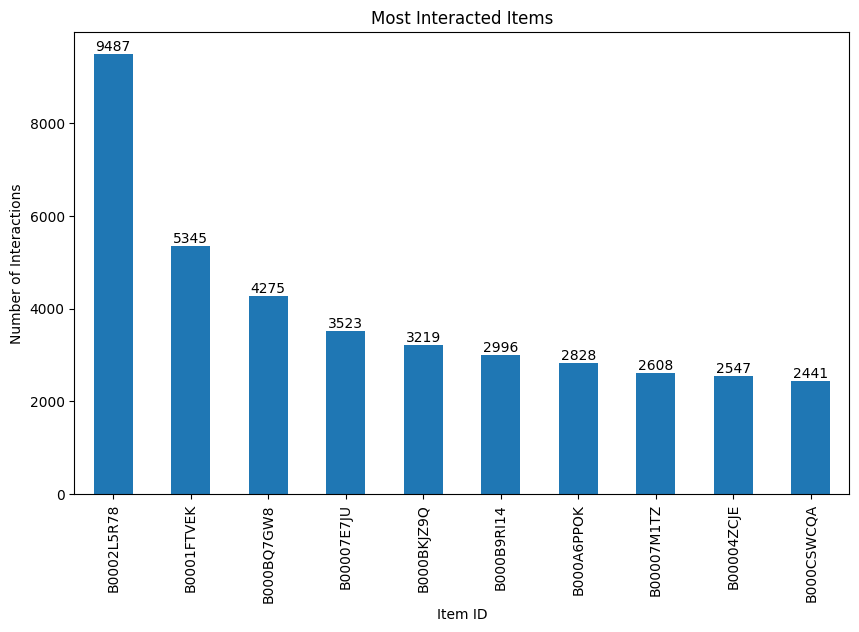

In [31]:
# Identify items that receive the most interactions
most_interacted_items = el_system['productid'].value_counts().head(10)

#bar chart
plt.figure(figsize=(10, 6))
ax = most_interacted_items.plot(kind='bar')

# Add title and labels
plt.title('Most Interacted Items')
plt.xlabel('Item ID')
plt.ylabel('Number of Interactions')

# Annotate each bar with the count
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center', va='bottom')

# Save the plot
plt.savefig('Most_Interacted_Items.png')

# Show the plot
plt.show()


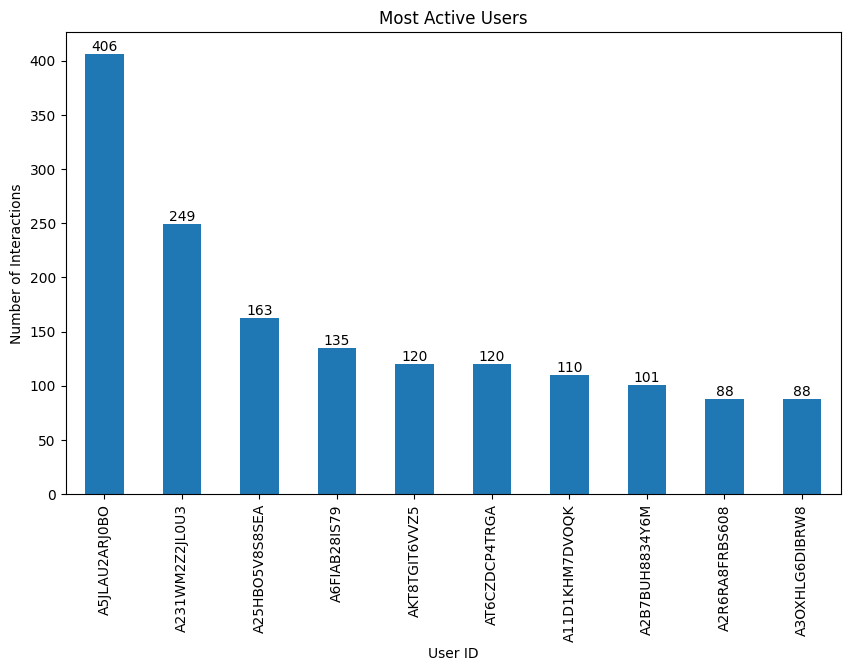

In [32]:
# Identify the most active users
most_active_user = el_system['userid'].value_counts().head(10)

# Plot these as a bar chart
plt.figure(figsize=(10, 6))
ax = most_active_user.plot(kind='bar')

# Add title and labels
plt.title('Most Active Users')
plt.xlabel('User ID')
plt.ylabel('Number of Interactions')

# Annotate each bar with the count
for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center', va='bottom')

# Save the plot
plt.savefig('Most_Active_Users.png')

# Show the plot
plt.show()
